# PERSPECTIVE TRANSFORMATION

In [1]:
#Importing necessary libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Importing image
First we will import test image using cv2.imread() but remember that cv2 uses BGR color format while matplot lib uses RGB color format while reading the images. So, we need to convert color of images from BGR to RGB using cvtColor while displaying.

In [2]:
image = cv2.imread('test.jpg')
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## Defining display function
Now we will be defining a display function using matplotlib library


In [3]:
def display_image(image):
    h,w,c = image.shape
    h=h/150
    w=w/150
    plt.figure(figsize=(w,h))
    plt.axis('off')
    plt.imshow(image)
    plt.show()

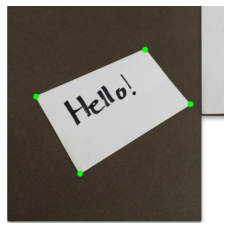

In [4]:
display_image(img)

Now we will be defining the bounding box points for the "HELLO!" text in our test image

In [5]:
pts = np.array([[130, 270],[325, 167], [363, 240],  [200, 350]])

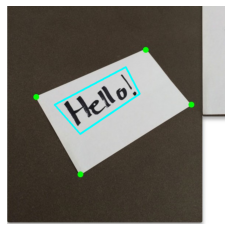

In [6]:
plt.axis('off')
plt.imshow(cv2.polylines(img,[pts],True,(0,255,255),3))
plt.show()

 We will define a function order_points which will help us to maintain consistent ordering of the points in the rectangle

In [7]:
def order_points(pts):
	# initialzie a list of coordinates that will be ordered
	# such that the first entry in the list is the top-left,
	# the second entry is the top-right, the third is the
	# bottom-right, and the fourth is the bottom-left
	rect = np.zeros((4, 2), dtype = "float32")
	# the top-left point will have the smallest sum, whereas
	# the bottom-right point will have the largest sum
	s = pts.sum(axis = 1)
	rect[0] = pts[np.argmin(s)]
	rect[2] = pts[np.argmax(s)]
	# now, compute the difference between the points, the
	# top-right point will have the smallest difference,
	# whereas the bottom-left will have the largest difference
	diff = np.diff(pts, axis = 1)
	rect[1] = pts[np.argmin(diff)]
	rect[3] = pts[np.argmax(diff)]
	# return the ordered coordinates
	return rect

In [8]:
order_points(pts)

array([[130., 270.],
       [325., 167.],
       [363., 240.],
       [200., 350.]], dtype=float32)

Now we will define our final Perspective tranformation function which will return the warped image

In [9]:
def four_point_transform(image, pts):
	# obtain a consistent order of the points and unpack them
	# individually
	rect = order_points(pts)
	(tl, tr, br, bl) = rect
	# compute the width of the new image, which will be the
	# maximum distance between bottom-right and bottom-left
	# x-coordiates or the top-right and top-left x-coordinates
	widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
	widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
	maxWidth = max(int(widthA), int(widthB))
	# compute the height of the new image, which will be the
	# maximum distance between the top-right and bottom-right
	# y-coordinates or the top-left and bottom-left y-coordinates
	heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
	heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
	maxHeight = max(int(heightA), int(heightB))
	# now that we have the dimensions of the new image, construct
	# the set of destination points to obtain a "birds eye view",
	# (i.e. top-down view) of the image, again specifying points
	# in the top-left, top-right, bottom-right, and bottom-left
	# order
	dst = np.array([
		[0, 0],
		[maxWidth - 1, 0],
		[maxWidth - 1, maxHeight - 1],
		[0, maxHeight - 1]], dtype = "float32")
	# compute the perspective transform matrix and then apply it
	M = cv2.getPerspectiveTransform(rect, dst)
	warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
	# return the warped image
	return warped

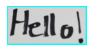

In [10]:
warped = four_point_transform(img, pts)
display_image(warped)